<a href="https://colab.research.google.com/github/princevalerie/tugas_data_mining/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import re
sns.set()
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/BTNG/heart_attack.csv")
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
data.sample(10)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
198,50,1,69,165,104,194.0,1.500,0.007,negative
162,57,1,70,144,75,111.0,3.580,0.164,positive
773,70,1,89,100,50,314.0,0.880,0.406,positive
1130,57,1,78,101,54,115.0,0.826,0.014,negative
1211,70,0,112,115,69,141.0,2.900,0.060,positive
1155,63,1,77,100,68,110.0,2.790,0.003,negative
1128,26,0,88,110,70,102.0,3.210,0.006,negative
47,45,1,76,133,75,238.0,1.830,0.004,negative
231,50,1,75,142,75,122.0,6.270,0.004,negative
248,50,0,63,129,67,94.0,3.230,0.003,negative


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
data.shape

(1319, 9)

In [8]:
data_dupl=data.duplicated().any()
print(data_dupl)
#cara mengatasi data duplicate
#data.drop_duplicates()

False


In [9]:
data.drop_duplicates()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [10]:
data.shape

(1319, 9)

In [11]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [12]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [13]:
data['class'].value_counts()

positive    810
negative    509
Name: class, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your pandas DataFrame
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [15]:
import pandas as pd
from scipy import stats

column_name='age'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
97     19       0       62            114           69    240.0  300.000   
500    19       0       70            117           76     91.0   36.240   
896   100       1       60            209           75    329.0    5.660   
899    14       0       89            111           57    133.0    2.620   
1039  103       0       86            146           92    120.0   69.320   
1126  103       0       56            171           56    150.0   51.960   
1269   19       1       68            116           74     99.0    0.606   

      troponin  class  
97       0.004      1  
500      0.025      1  
896      0.840      1  
899      0.012      0  
1039     0.059      1  
1126     0.044      1  
1269     0.003      0  


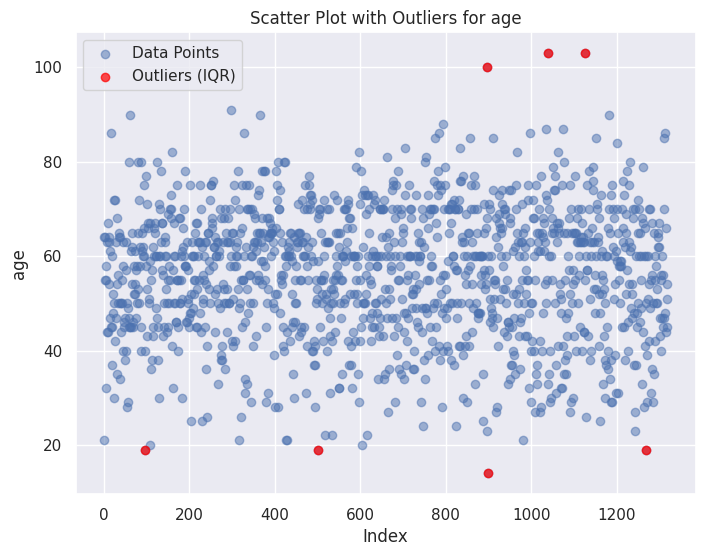

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [17]:
data.shape

(1312, 9)

In [18]:
import pandas as pd
from scipy import stats

column_name='impluse'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
21     48       1      135             98           60    100.0   94.790   
30     54       1      125            131           82     95.0    1.310   
63     45       1     1111            141           95    109.0    1.330   
125    47       1      125            121           60     89.0    2.270   
221    63       1      120            140           90    100.0   98.480   
222    55       1      122            147           95     96.0    3.860   
223    63       1      119            170          107    129.0    2.610   
287    44       0      117            112           74    113.0    2.640   
346    60       1      134            111           69    163.0    3.080   
351    69       1      119            113           79    184.0    8.870   
457    65       1      132            125           74    196.0    1.420   
459    65       0      125             92           60    136.0    1.490   
682    68   

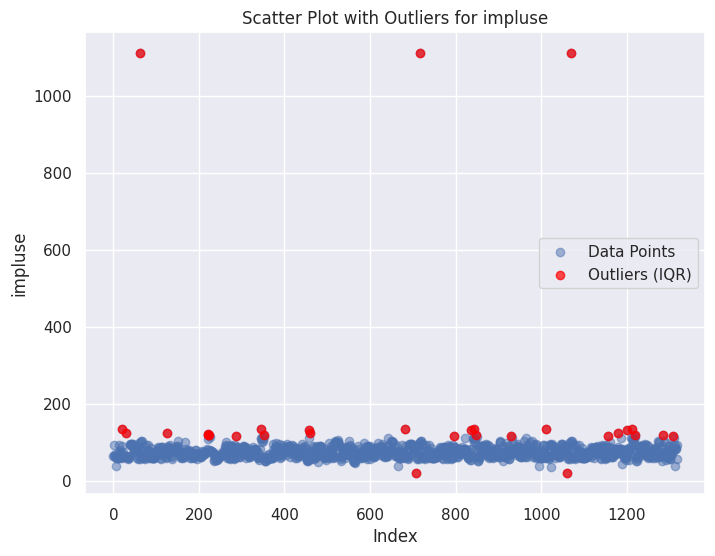

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [20]:
data.shape

(1282, 9)

In [21]:
import pandas as pd
from scipy import stats

column_name='pressurehight'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose      kcm  \
7      63       1       60            214           82     87.0  300.000   
12     64       1       60            199           99     92.0    3.430   
89     61       1       60            202           88    111.0    0.633   
209    60       1       68             42           64    106.0    0.879   
220    60       0      110            220          128    101.0    1.280   
311    63       1       74            208          100    100.0    2.540   
411    74       0       90            198           48    102.0   38.940   
427    58       0       69            214           88     95.0  185.100   
428    21       1       85            204           84     93.0    2.710   
429    44       0       65            200           80    261.0  207.500   
486    63       1       74            223          118    161.0    2.970   
645    47       0       81            200          110     97.0   13.730   
667    65   

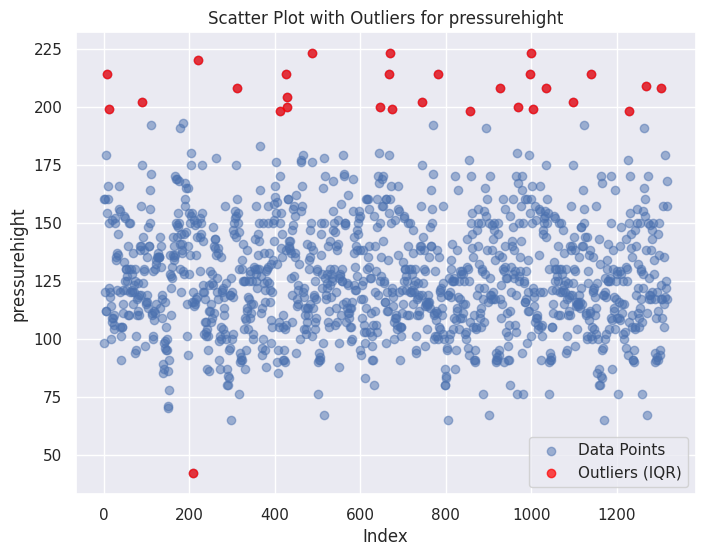

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [23]:
data.shape

(1253, 9)

##pressure low

In [24]:
import pandas as pd
from scipy import stats

column_name='pressurelow'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
179    68       1       67            191          110    165.0   2.58   
404    72       1       79            159          110    175.0   2.92   
514    72       1       60            178          109    156.0  17.04   
893    54       0       65            191          110    140.0   2.59   
1203   65       1       77             76          154     93.0   3.81   
1264   60       1       65            191          110    131.0   3.43   

      troponin  class  
179      0.010      0  
404      1.550      1  
514      0.627      1  
893      0.540      1  
1203     0.029      1  
1264     0.018      1  


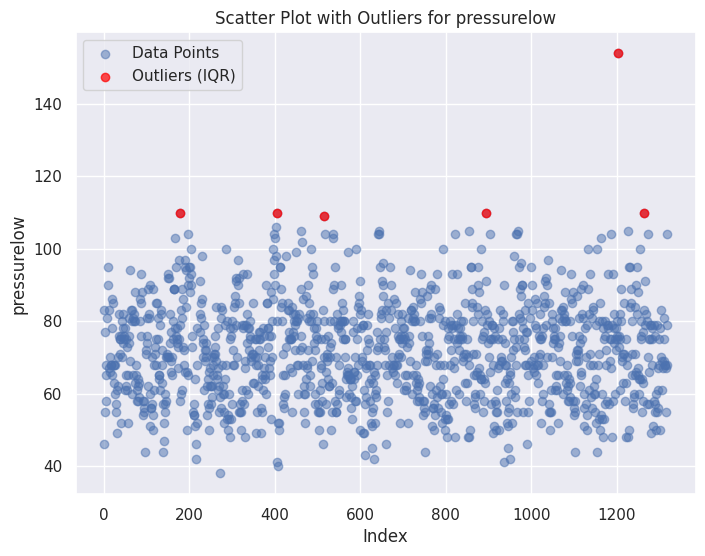

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [26]:
data.shape

(1247, 9)

##pressure low

In [27]:
import pandas as pd
from scipy import stats

column_name='glucose'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
1      21       1       94             98           46    296.0   6.750   
4      55       1       64            112           65    300.0   1.080   
14     47       1       76            120           70    319.0   2.570   
20     60       1       92            151           78    301.0   1.600   
31     35       1       62            137           61    321.0   4.580   
...   ...     ...      ...            ...          ...      ...     ...   
1265   41       1       83            153           91    302.0   1.420   
1274   70       1      103            126           75    541.0   0.665   
1294   50       0       79             92           55    415.0  16.950   
1310   70       0       80            135           75    351.0   2.210   
1317   54       1       58            117           68    443.0   5.800   

      troponin  class  
1        1.060      1  
4        0.003      0  
14       0.003      0  
20 

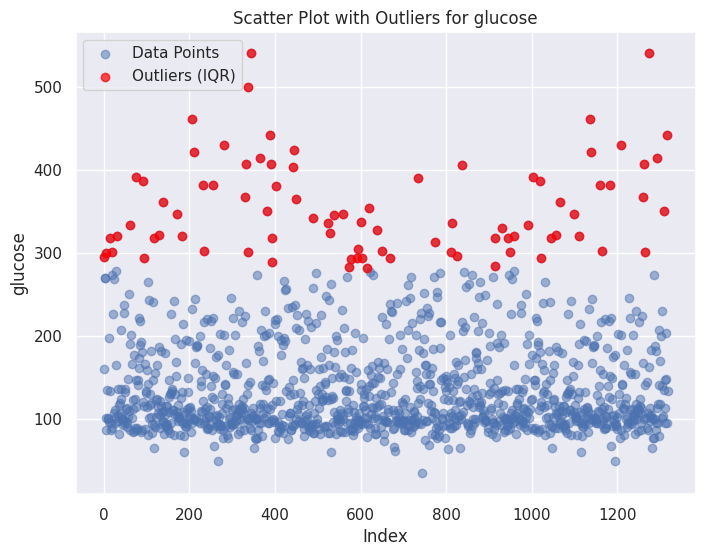

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

##pressure low

In [29]:
import pandas as pd
from scipy import stats

column_name='kcm'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose     kcm  \
3      64       1       70            120           55    270.0   13.87   
23     30       1       63            110           68    107.0   50.46   
24     50       1       63            104           63    269.0   38.72   
28     47       0       66            134           57    279.0  300.00   
39     34       1       96            105           75    136.0   15.23   
...   ...     ...      ...            ...          ...      ...     ...   
1280   31       1       72            117           49    184.0  300.00   
1291   58       1       98             91           50    182.0   15.23   
1306   60       0       78            109           69    230.0   19.47   
1309   47       1       94            105           81    135.0   36.24   
1318   51       1       94            157           79    134.0   50.89   

      troponin  class  
3        0.122      1  
23       0.003      1  
24       0.612      1  
28 

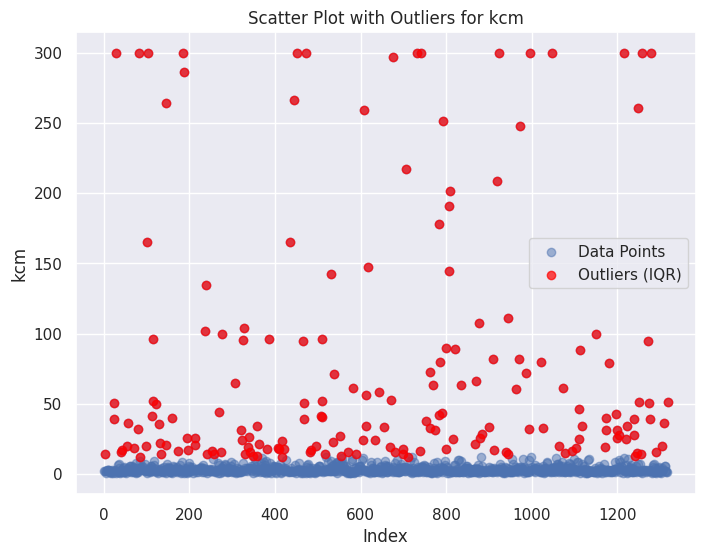

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [31]:
data.shape

(983, 9)

In [32]:
data.shape

(983, 9)

##pressure low

In [33]:
import pandas as pd
from scipy import stats

column_name='troponin'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
16     86       0       73            114           68     87.0  1.110   
22     52       1       76            109           85    227.0  0.665   
25     72       1       64            106           68    111.0  2.110   
29     63       1       66            135           55    166.0  0.493   
34     50       1       61            136           70    136.0  1.370   
...   ...     ...      ...            ...          ...      ...    ...   
1300   43       1       90             95           50    118.0  1.330   
1304   56       0       68            123           70    102.0  2.280   
1305   47       1       71            117           61    140.0  4.390   
1307   56       1       75            157           67    104.0  2.410   
1316   45       1       85            168          104     96.0  1.240   

      troponin  class  
16       0.776      1  
22       0.491      1  
25       1.390      1  
29      10.000 

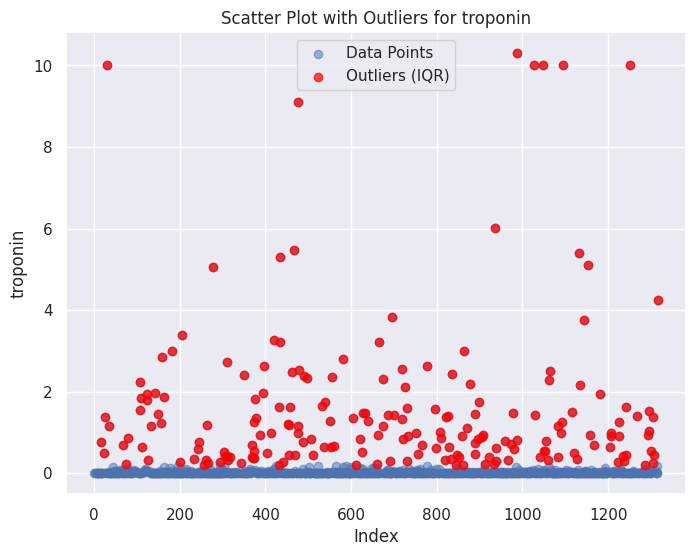

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [35]:
data.shape

(788, 9)

In [36]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
2,55,1,64,160,77,270.0,1.99,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
8,44,0,60,154,81,135.0,2.35,0.004,0
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,1
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0


In [37]:
data['class'] = data['class'].replace({'negative': 0, 'positive': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            788 non-null    int64  
 1   gender         788 non-null    int64  
 2   impluse        788 non-null    int64  
 3   pressurehight  788 non-null    int64  
 4   pressurelow    788 non-null    int64  
 5   glucose        788 non-null    float64
 6   kcm            788 non-null    float64
 7   troponin       788 non-null    float64
 8   class          788 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 61.6 KB


In [38]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
2,55,1,64,160,77,270.0,1.99,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
8,44,0,60,154,81,135.0,2.35,0.004,0
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,1
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0


In [39]:
#Normalisasi Data
columns_to_normalize=['age','gender','impluse','pressurehight','pressurelow','glucose','kcm','troponin']
x_data=data[columns_to_normalize]
x_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
2,55,1,64,160,77,270.0,1.99,0.003
5,58,0,61,112,58,87.0,1.83,0.004
6,32,0,40,179,68,102.0,0.71,0.003
8,44,0,60,154,81,135.0,2.35,0.004


In [40]:
#Menampilkan class
y_target=data['class']
y_target.head()

0    0
2    0
5    0
6    0
8    0
Name: class, dtype: int64

In [41]:
#Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_data_normalized=scaler.fit_transform(x_data)
x_data_normalized=pd.DataFrame(x_data_normalized,columns=columns_to_normalize)

x_data_normalized.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,0.614286,1.0,0.3750,0.742188,0.671642,0.512295,0.127292,0.052632
1,0.485714,1.0,0.3500,0.742188,0.582090,0.963115,0.143644,0.005263
2,0.528571,0.0,0.3125,0.367188,0.298507,0.213115,0.129873,0.010526
3,0.157143,0.0,0.0500,0.890625,0.447761,0.274590,0.033480,0.005263
4,0.328571,0.0,0.3000,0.695312,0.641791,0.409836,0.174628,0.010526


In [42]:
#Menghitung jumlah class negative dan positive
data['class'].value_counts()

0    446
1    342
Name: class, dtype: int64

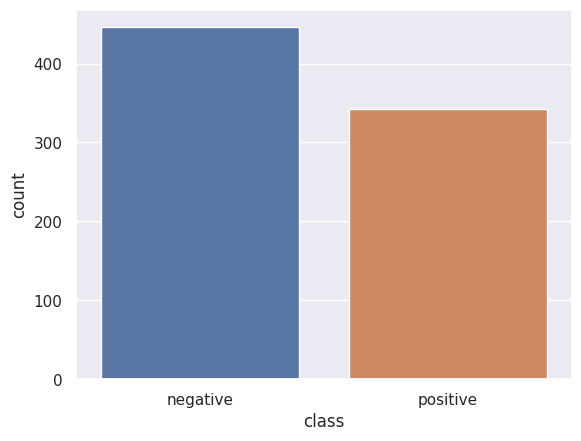

In [43]:
#Membuat Grafik
sns.countplot(x='class',data=data)
plt.xticks([0,1],['negative','positive'])
plt.show()

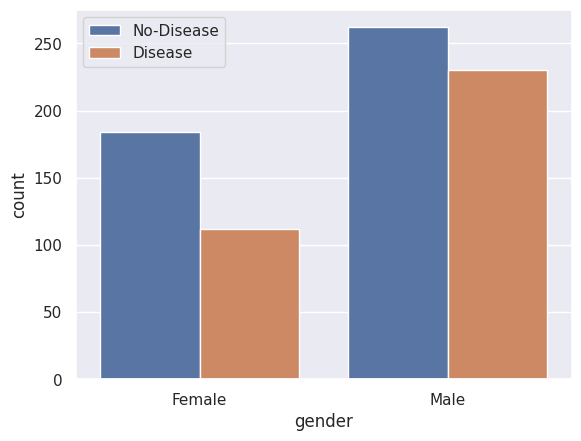

In [44]:
#Membuat Grafik gender
sns.countplot(x='gender',hue="class",data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

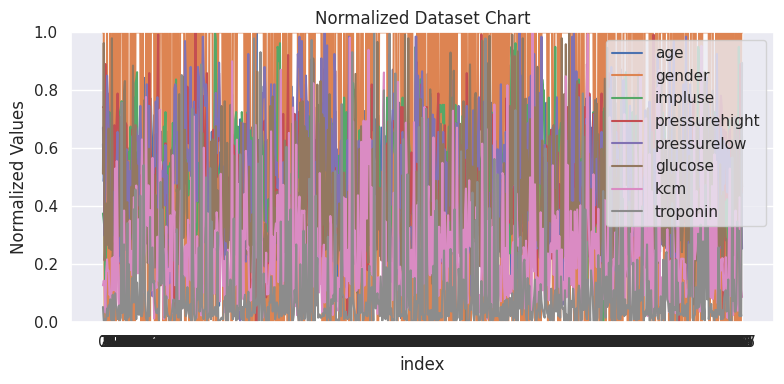

In [45]:
#Membuat chart untuk visualisasi data yang sudah di normalisasi
fig,ax=plt.subplots(figsize=(8,4))

for column in columns_to_normalize:
  ax.plot(x_data_normalized[column],label=column)

ax.set_xticks(range(len(x_data_normalized)))
ax.set_xticklabels(x_data_normalized.index)
ax.set_ylim(0,1)
ax.set_xlabel('index')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Dataset Chart')
ax.legend()
plt.tight_layout()
plt.show()

In [46]:
X_1=x_data_normalized.copy()
y_1=y_target.copy()

#model decision treenya

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [48]:
X = X_1
y = y_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of X_Train set : {}'.format(X_train.shape))
print('Shape of y_Train set : {}'.format(y_train.shape))
print('_'*50)
print('Shape of X_test set : {}'.format(X_test.shape))
print('Shape of y_test set : {}'.format(y_test.shape))

Shape of X_Train set : (630, 8)
Shape of y_Train set : (630,)
__________________________________________________
Shape of X_test set : (158, 8)
Shape of y_test set : (158,)


In [49]:

criterions = ['gini', 'entropy', 'log_loss']
best_criterion = str()
splitters = ['best', 'random']
best_splitter = str()
max_depthes = [None, 3, 4, 5, 6, 7, 8, 9]
best_depth = int()
best_acc = 0

for criterion in criterions :
    for splitter in splitters :
        for depth in max_depthes :
            # Modeling
            DTs = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=depth, random_state=0)
            DTs.fit(X_train, y_train)
            y_pred = DTs.predict(X_test)
            # Score
            score = accuracy_score(y_test, y_pred)
            # mencari best parameter
            if (score > best_acc) and (score < 0.99) :
              best_acc = score
              best_criterion = criterion
              best_splitter = splitter
              best_depth = depth
            else :
                continue
print('Best Criterion : ', best_criterion)
print('Best splitter : ', best_splitter)
print('Best depth : ', best_depth)
print('Accuracy Score : ', best_acc)

Best Criterion :  gini
Best splitter :  best
Best depth :  5
Accuracy Score :  0.9873417721518988
